# import libraries

In [2]:
# import libraries
import numpy as np
import pandas as pd

# import dataset

In [3]:
# import dataset
insurance_df = pd.read_csv('insurance.csv')

# make a copy of the original dataset
insurance = insurance_df.copy()

In [4]:
# initial look at the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# basic info about the data
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# basisc statistical details about the data
insurance.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [7]:
#  basic statistical details about categorical columns
insurance.describe(include='O').transpose()

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [8]:
# list catagorical unique values
for col in insurance.select_dtypes(include='object'):
    print(f'{col} : {insurance[col].unique()}')

sex : ['female' 'male']
smoker : ['yes' 'no']
region : ['southwest' 'southeast' 'northwest' 'northeast']


# data cleaning

In [9]:
# check for missing values
insurance.isnull().sum()

# at this point, no furthre cleaning is required as there are no missing values or duplicates

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# data modeling

In [10]:
# encode target variable "region" with integer encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
insurance['region_encoded'] = le.fit_transform(insurance['region'])
## save classes for future reference
region_classes = le.classes_

# one hot encode categorical variables
insurance = pd.get_dummies(insurance, columns=['sex', 'smoker'], drop_first=True)



In [11]:
# split the data into features and target
X = insurance.drop(columns=['region', 'region_encoded'], axis=1 )
y = insurance['region_encoded']

In [12]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


In [13]:
# train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)

In [14]:
# model fitting
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

# model predict

In [15]:
# model predictions
y_pred = rfc.predict(X_test)

# model evaluation

In [16]:
# model evaluations using accuracy, confusion matrix and classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=region_classes)
print(f'Accuracy: {accuracy:.4f}\n')
print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)


Accuracy: 0.3731

Confusion Matrix:
[[20 35 13 13]
 [19 33 15 15]
 [14  6 52 19]
 [11 20 30 20]]

Classification Report:
              precision    recall  f1-score   support

   northeast       0.31      0.25      0.28        81
   northwest       0.35      0.40      0.38        82
   southeast       0.47      0.57      0.52        91
   southwest       0.30      0.25      0.27        81

    accuracy                           0.37       335
   macro avg       0.36      0.37      0.36       335
weighted avg       0.36      0.37      0.36       335



# feature importance

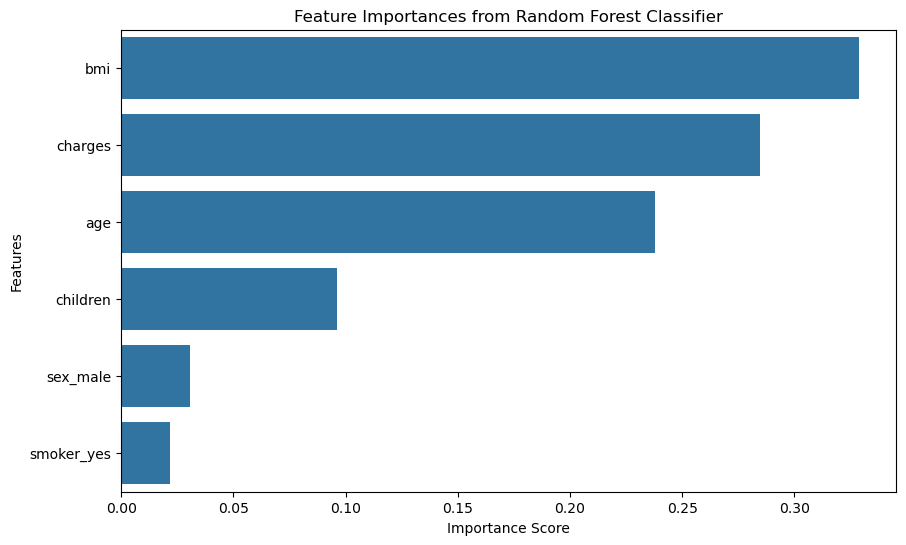

In [17]:
# feature importance
import matplotlib.pyplot as plt
import seaborn as sns
feature_importances = pd.Series(rfc.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances from Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()